In [1]:
import mysql.connector

In [2]:
#establishing connection between SQL database and jupyter notebook
mydb = mysql.connector.connect(
host = "172.31.37.112",
user = "capital_user",
password = "N@ewGi453@2",
db = "capital_v2"
)


In [3]:
print(mydb.is_connected())

True


In [4]:
#creating cursor for SQL
cur = mydb.cursor()

In [5]:
cur.execute("SELECT * FROM `raw_kpi_data` WHERE `sector_code` LIKE '%FINS%' AND `kpi_code` = 'ghg-5' LIMIT 5000")

In [6]:
data = cur.fetchall()

In [7]:
sequence = cur.column_names

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt


In [9]:
pd.DataFrame(data, columns = sequence)

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
0,21306,GHG-5,ALLIAN00001,DEU,2018,None,167533,MTCO2e,167533,MTCO2E,...,FINS,S027,ncx,API-26579,None,None,None,2020-12-30 10:04:04,2022-04-14 15:20:49,10.0
1,21590,GHG-5,COMMON00001,AUS,2018,None,85754,MTCO2e,85754,MTCO2E,...,FINS,S005,ncx,API-26999,None,None,None,2021-01-07 10:26:23,2022-04-25 17:05:39,10.0
2,33234,GHG-5,WESTPA00001,AUS,2018,None,65783,MTCO2E,65783,MTCO2E,...,FINS,S027,ncx,API-26777,None,None,None,2020-12-21 10:31:04,2020-12-21 10:31:05,10.0
3,43174,GHG-5,NATION00001,AUS,2018,None,64287,MTCO2e,64287,MTCO2E,...,FINS,S005,ncx,API-27007,None,None,None,2021-01-12 19:06:44,2021-01-12 19:06:46,10.0
4,56522,GHG-5,LLOYDS00001,GBR,2018,None,64710,MTCO2E,64710,MTCO2E,...,FINS,S027,ncx,API-26633,None,None,None,2020-12-30 09:58:53,2020-12-30 09:58:53,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,33391310,GHG-5,BUREEQ00001,SWE,2020,None,3279,MTCO2e,3279,MTCO2E,...,FINS,S005,ncx,API-159156,None,None,None,2023-06-02 15:37:20,NaT,NaN
1982,33391318,GHG-5,BUREEQ00001,SWE,2022,None,7346,MTCO2e,7346,MTCO2E,...,FINS,S005,ncx,API-159154,None,None,None,2023-06-02 15:37:52,NaT,NaN
1983,33391319,GHG-5,BUREEQ00001,SWE,2021,None,6170,MTCO2e,6170,MTCO2E,...,FINS,S005,ncx,API-159154,None,None,None,2023-06-02 15:37:52,NaT,NaN
1984,33391362,GHG-5,DNBXXX00001,NOR,2020,None,2835,MTCO2e,2835,MTCO2E,...,FINS,S015,ncx,API-76201,None,None,None,2023-06-05 04:19:29,2023-06-05 10:02:52,NaN


In [10]:
df = pd.DataFrame(data, columns = sequence)

In [11]:
df = df.astype({'converted_data': 'float'})

In [12]:
df["converted_data"].dtypes

dtype('float64')

In [13]:
cf.go_offline()
df[["converted_data"]].iplot(kind = 'scatter')

In [14]:
df["converted_data"].describe()

count    1.986000e+03
mean     4.879555e+05
std      6.396264e+06
min      0.000000e+00
25%      5.811500e+02
50%      4.268300e+03
75%      2.235954e+04
max      1.432580e+08
Name: converted_data, dtype: float64

In [15]:
df.loc[1860:1870, ['id','company_code','converted_data']]

,id,company_code,converted_data
1860,33327889,INTERN00029,74.230
1861,33327890,INTERN00029,101.072
1862,33328827,BETSSO00001,7173.000
1863,33328830,BETSSO00001,8185.000
1864,33328831,BETSSO00001,8312.000
1865,33328889,BETSSO00001,3749.000
1866,33328891,BETSSO00001,1628.000
1867,33334476,ARTATE00001,2.960
1868,33334479,ARTATE00001,8.480
1869,33334492,ARTATE00001,10.200


In [16]:
df1 = df.drop(df.index[1862:1868], axis = 0)

In [17]:
df1

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
0,21306,GHG-5,ALLIAN00001,DEU,2018,None,167533,MTCO2e,167533.0,MTCO2E,...,FINS,S027,ncx,API-26579,None,None,None,2020-12-30 10:04:04,2022-04-14 15:20:49,10.0
1,21590,GHG-5,COMMON00001,AUS,2018,None,85754,MTCO2e,85754.0,MTCO2E,...,FINS,S005,ncx,API-26999,None,None,None,2021-01-07 10:26:23,2022-04-25 17:05:39,10.0
2,33234,GHG-5,WESTPA00001,AUS,2018,None,65783,MTCO2E,65783.0,MTCO2E,...,FINS,S027,ncx,API-26777,None,None,None,2020-12-21 10:31:04,2020-12-21 10:31:05,10.0
3,43174,GHG-5,NATION00001,AUS,2018,None,64287,MTCO2e,64287.0,MTCO2E,...,FINS,S005,ncx,API-27007,None,None,None,2021-01-12 19:06:44,2021-01-12 19:06:46,10.0
4,56522,GHG-5,LLOYDS00001,GBR,2018,None,64710,MTCO2E,64710.0,MTCO2E,...,FINS,S027,ncx,API-26633,None,None,None,2020-12-30 09:58:53,2020-12-30 09:58:53,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,33391310,GHG-5,BUREEQ00001,SWE,2020,None,3279,MTCO2e,3279.0,MTCO2E,...,FINS,S005,ncx,API-159156,None,None,None,2023-06-02 15:37:20,NaT,NaN
1982,33391318,GHG-5,BUREEQ00001,SWE,2022,None,7346,MTCO2e,7346.0,MTCO2E,...,FINS,S005,ncx,API-159154,None,None,None,2023-06-02 15:37:52,NaT,NaN
1983,33391319,GHG-5,BUREEQ00001,SWE,2021,None,6170,MTCO2e,6170.0,MTCO2E,...,FINS,S005,ncx,API-159154,None,None,None,2023-06-02 15:37:52,NaT,NaN
1984,33391362,GHG-5,DNBXXX00001,NOR,2020,None,2835,MTCO2e,2835.0,MTCO2E,...,FINS,S015,ncx,API-76201,None,None,None,2023-06-05 04:19:29,2023-06-05 10:02:52,NaN


In [18]:
df1['converted_data'].iplot()

In [19]:
df1['converted_data'].describe()

count    1.980000e+03
mean     4.894195e+05
std      6.405898e+06
min      0.000000e+00
25%      5.800000e+02
50%      4.268300e+03
75%      2.241525e+04
max      1.432580e+08
Name: converted_data, dtype: float64

import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df1['converted_data'], dist="norm", plot=plt)
plt.show()

In [20]:
df1['converted_data'].iplot()

In [21]:
#sector check for companies where values are shooting with index filter. 
df1.loc[[24,34,111,488,601,911, 971, 1111, 1562,1626], ['company_code', 'converted_data']]

,company_code,converted_data
24,CHALLE00001,4659.20
34,HANGSE00001,685.98
111,BANCOD00002,12028.00
488,BLACKS00001,15890.00
601,SYNCHR00001,12437.00
911,MEDIOB00001,774.59
971,EXPERI00001,532900.00
1111,SABANC00001,24857.00
1562,DOHABA00001,1.89
1626,BANKOF00049,1286.00


In [22]:
#SUMITO00002 lies in 'conglomerate sector'
df1[df1['company_code']=='SUMITO00002']

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
665,21924286,GHG-5,SUMITO00002,JPN,2019,None,71320,MTCO2E,71320.0,MTCO2E,...,FINS,S017,ncx,API-54485,None,None,None,2022-04-26 15:12:57,2022-04-26 15:13:50,NaN
666,21924302,GHG-5,SUMITO00002,JPN,2018,None,73980,MTCO2E,73980.0,MTCO2E,...,FINS,S017,ncx,API-54485,None,None,None,2022-04-26 15:12:57,2022-04-26 15:13:50,NaN


In [23]:
#Data cleaning: 'SUMITO00002' lies in Conglomerate sector
df2 = df1.drop(df1[(df1['company_code']=='SUMITO00002')].index)

In [24]:
df2['converted_data'].iplot()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='converted_data'>

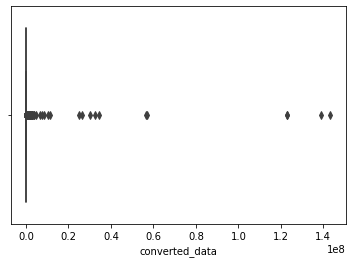

In [25]:
#OutLiers:
#1. using 'box-plot'
sns.boxplot(df2['converted_data'])

In [26]:
#from above observation, the values beyond ~250000 are outliers.
print(np.where(df2['converted_data']>19000000))
# following output gives outlier values.

(array([ 283,  284,  285,  367,  368,  556,  582,  837,  881, 1075, 1666],
      dtype=int64),)


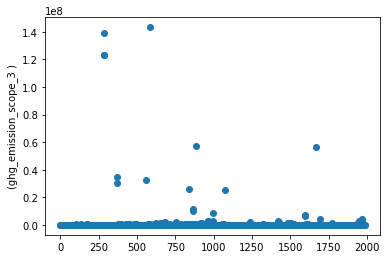

In [27]:
#2. Using Scatterplot:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df2.index,df2['converted_data'])
 
# y-axis label
ax.set_ylabel('(ghg_emission_scope_3 )')
plt.show()

In [28]:
#3. IQR(Inner Quartile Range)
# Calculate the upper and lower limits
Q1 = df1['converted_data'].quantile(0.25)
Q3 = df1['converted_data'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df1['converted_data']>=upper)[0]
lower_array = np.where(df1['converted_data']<=lower)[0]
 
# Removing the outliers
df1.drop(index=upper_array, inplace=True)
df1.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df1.shape)

New Shape:  (1647, 22)


In [29]:
Q1

580.0

In [30]:
Q3

22415.25

In [31]:
# Scope 3 GHG emission Financial sector benchmark in MTCO2e
Benchmark = IQR/2

In [32]:
Benchmark

10917.625